<a href="https://colab.research.google.com/github/azydek0/python-homework_04/blob/arkadiusz/project_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astropy
!pip install astroplan

In [2]:
!pip install timezonefinder[numba]
!pip install geopy

In [3]:
from astropy import constants as const
from astropy import units as u
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
from astroplan import Observer
from astropy.time import Time
import pytz
from timezonefinder import TimezoneFinder
from geopy import geocoders
from astroplan.plots import plot_sky
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

In [4]:
local_tz = pytz.timezone('Europe/Warsaw')
local_tz

<DstTzInfo 'Europe/Warsaw' LMT+1:24:00 STD>

In [5]:
katowice = Observer(longitude=19*u.deg + 1*u.arcmin, latitude=50*u.deg + 16 * u.arcmin, elevation=230*u.m, name="Katowice", timezone=local_tz)
katowice

<Observer: name='Katowice',
    location (lon, lat, el)=(19.016666666666666 deg, 50.266666666666666 deg, 230.00000000008052 m),
    timezone=<DstTzInfo 'Europe/Warsaw' LMT+1:24:00 STD>>

In [6]:
nowtime = Time.now()
nowtime

<Time object: scale='utc' format='datetime' value=2020-11-24 11:37:36.089217>

In [7]:
nowtime.to_datetime(timezone=local_tz)

datetime.datetime(2020, 11, 24, 12, 37, 36, 89217, tzinfo=<DstTzInfo 'Europe/Warsaw' CET+1:00:00 STD>)

In [8]:
sunrise = katowice.sun_rise_time(nowtime)

In [9]:
sunrise.ymdhms

(2020, 11, 24, 6, 18, 30.90932339)

In [10]:
result = katowice.sun_altaz(sunrise)
result

<SkyCoord (AltAz: obstime=2459177.762857747, location=(3862287.59388808, 1331149.09201147, 4881979.18528353) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    (123.47822779, 0.00018074, 1.47687083e+11)>

In [11]:
# Klasa - arg1= lokalizacja (string, format: 'Miasto, Kraj'), arg2= data (format: "RRRR-MM-DD", ale może działają też inne, trzeba sprawdzić)
class TravelerInTimeAndSapce():
    def __init__(self, location, date):
        locator = geocoders.Nominatim(user_agent='myGeocoder').geocode(location)
        date_time = Time
        timezone = TimezoneFinder().timezone_at(lng=locator.longitude , lat=locator.latitude)
        self.lat = locator.latitude * u.deg
        self.lon = locator.longitude * u.deg
        self.address = locator.address
        self.time = Time(date).to_datetime(pytz.timezone(timezone))
        self.tzname = self.time.timetz().tzname()
    def __repr__(self):
        return ('lat=' + str(self.lat) + 
            '; lon=' + str(self.lon) + 
            '; address=' + str(self.address) + 
            '; time=' + str(self.time) + 
            '; tz=' + str(self.tzname))

In [12]:
# Użycie i wywołanie metod powyższej klasy
traveler = TravelerInTimeAndSapce('Paris, France', '1999-01-01')
print(traveler.address)
print(traveler.lat, traveler.lon)
print(traveler.time)
print(traveler.tzname)
traveler

Paris, Île-de-France, France métropolitaine, 75004, France
48.8566969 deg 2.3514616 deg
1999-01-01 01:00:00+01:00
Europe/Paris


lat=48.8566969 deg; lon=2.3514616 deg; address=Paris, Île-de-France, France métropolitaine, 75004, France; time=1999-01-01 01:00:00+01:00; tz=Europe/Paris

In [13]:
observe_time = Time('2000-03-15 00:00:00')
observe_time = observe_time + np.linspace(0, 24, 13)*u.hour

In [14]:
# Tutaj przykład z danymi
# Powinno to wyglądać podobnie w finalnej wersji
# Poniżej użyłem matplotliba do zrobienia wykresu typu polar, wydaje mi się że jest ok
# UWAGA azymut podawany jest w radianach na potrzeby wykresu typu polar

obs_time = katowice.sun_altaz(observe_time).obstime.value
obs_sun_az = katowice.sun_altaz(observe_time).az.radian
obs_sun_alt = katowice.sun_altaz(observe_time).alt.value
obs_moon_az = katowice.moon_altaz(observe_time).az.radian
obs_moon_alt = katowice.moon_altaz(observe_time).alt.value
obs_sun_alt

array([-39.7785936 , -27.72564453,  -9.98457662,   9.06979714,
        26.05351968,  36.58170926,  35.87361486,  24.33600307,
         6.94797481, -12.07554541, -29.32739624, -40.20281093,
       -39.37813256])

(90.0, 0.0)

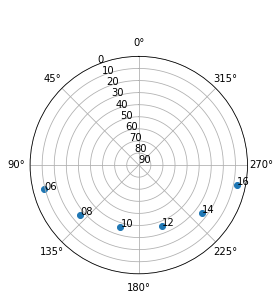

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(obs_sun_az, obs_sun_alt)

for i, txt in enumerate(obs_time):
    ax.annotate(txt[11:13], (obs_sun_az[i], obs_sun_alt[i]))


ax.set_theta_zero_location('N')
ax.set_rlim(90, 0, 1)
